In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore", "(Possibly )?corrupt EXIF data", UserWarning)

import os, shutil
import json

plt.style.use('ggplot')

%matplotlib inline

# %load_ext jupyternotify

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
# importing dataset

original_dataset_dir = 'data/PetImages'

# subset directories to store images

# directory names

base_dir = 'data/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_dir = os.path.join(base_dir,'validation')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

test_dir = os.path.join(base_dir,'test')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

try:
    # creating directories: 
    
    os.mkdir(base_dir)
    
    os.mkdir(train_dir)    
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)        
    
    os.mkdir(validation_dir)    
    os.mkdir(validation_cats_dir)    
    os.mkdir(validation_dogs_dir)
    
    
    os.mkdir(test_dir)    
    os.mkdir(test_cats_dir)    
    os.mkdir(test_dogs_dir)
    
    for i in range(1000):
        # training sample
        
        file_name = str(i)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(train_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(train_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
    for i in range(1000,1500):
        
        # validation sample
        
        file_name = str(i)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(validation_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(validation_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
        # testing sample
        
        j = i + 500
        
        file_name = str(j)+'.jpg'
        
        # for cats
        src = os.path.join(original_dataset_dir,'Cat',file_name)
        dst = os.path.join(test_cats_dir,file_name)
        shutil.copyfile(src,dst)
        
        #for dogs
        src = os.path.join(original_dataset_dir,'Dog',file_name)
        dst = os.path.join(test_dogs_dir,file_name)
        shutil.copyfile(src,dst)
        
    
    
except FileExistsError:
    print('base_dir:',base_dir,'already exist')
    print('no sub-directories will be created')

base_dir: data/cats_and_dogs_small already exist
no sub-directories will be created


In [3]:
# check number of images in each sample
print('Total Cat images')
print('training images: ',len(os.listdir(train_cats_dir)))
print('validation images: ',len(os.listdir(validation_cats_dir)))
print('testing images: ', len(os.listdir(test_cats_dir)))
print('')
print('Total Dog images ')
print('training images: ',len(os.listdir(train_dogs_dir)))
print('validation images: ',len(os.listdir(validation_dogs_dir)))
print('testing images: ', len(os.listdir(test_dogs_dir)))

Total Cat images
training images:  1000
validation images:  500
testing images:  500

Total Dog images 
training images:  1000
validation images:  500
testing images:  500


In [4]:
# Instantiating a small convnet


model = models.Sequential()

model.add(layers.Conv2D(filters=32,
                        kernel_size=[3,3],
                        activation='relu',
                        input_shape=[150,150,3]))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=64,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=128,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Conv2D(filters=128,
                        kernel_size=[3,3],
                        activation='relu'))
model.add(layers.MaxPool2D(pool_size=[2,2]))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
# configure the model for training

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
# reading images

# rescaling all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=[150,150], 
                                                    batch_size=20,
                                                    class_mode='binary') # binary labels
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=[150,150],
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
# # Fit model using a batch generator

# history = model.fit_generator(generator=train_generator,
#                               steps_per_epoch=100,
#                               epochs=30,
#                               validation_data=validation_generator,
#                               validation_steps=50)

Epoch 1/30
100/100 [==============================] - 78s 784ms/step - loss: 0.6923 - acc: 0.5145 - val_loss: 0.6711 - val_acc: 0.6140
Epoch 2/30
100/100 [==============================] - 76s 757ms/step - loss: 0.6695 - acc: 0.5955 - val_loss: 0.6839 - val_acc: 0.5620
Epoch 3/30
100/100 [==============================] - 80s 801ms/step - loss: 0.6296 - acc: 0.6615 - val_loss: 0.6190 - val_acc: 0.6570
Epoch 4/30
100/100 [==============================] - 76s 757ms/step - loss: 0.5841 - acc: 0.6905 - val_loss: 0.6004 - val_acc: 0.6660
Epoch 5/30
100/100 [==============================] - 71s 715ms/step - loss: 0.5447 - acc: 0.7145 - val_loss: 0.5698 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 74s 744ms/step - loss: 0.5161 - acc: 0.7505 - val_loss: 0.5760 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 76s 758ms/step - loss: 0.4963 - acc: 0.7655 - val_loss: 0.5453 - val_acc: 0.7360
Epoch 8/30
100/100 [==============================] - 7

In [9]:
# # save model training history
# pd.DataFrame(history.history).to_csv('models/cats_and_dog_1.csv',index=False)

In [10]:
# # saving model
# model.save('models/cats_and_dog_1.h5')

In [11]:
# # loading saved model
model = models.load_model('models/cats_and_dog_1.h5')

In [12]:
# # loading history data
history = pd.read_csv('models/cats_and_dog_1.csv')

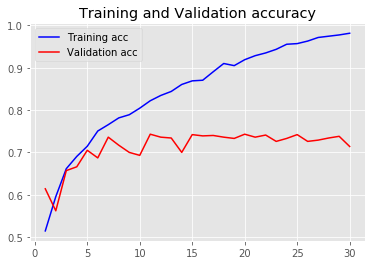

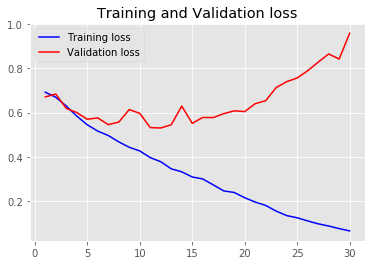

In [13]:
# plots
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [14]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary')

evaluation = model.evaluate_generator(test_generator,
                          steps=50)

Found 1000 images belonging to 2 classes.


In [15]:
for i in range(2):
    print(model.metrics_names[i],':',evaluation[i])

loss : 0.9533123116807889
acc : 0.7195431472081218


In [16]:
# data augmentation set up
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

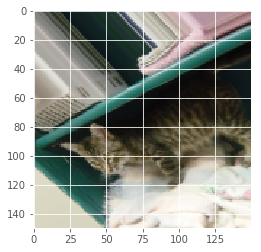

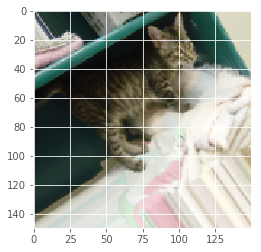

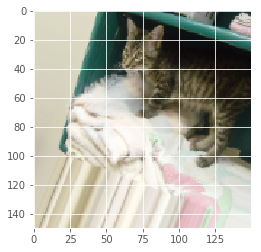

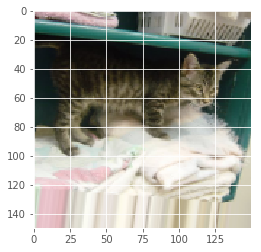

In [17]:
# some randomly augmented pictures 
fnames = [os.path.join(train_cats_dir,fname) 
          for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img) #convert to numpy array; 3d 150*150*3
x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images. Loops indefinitely, 
# so you need to break the loop at some point!

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()


In [18]:
# Model 2 with augmented data
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3,3) , activation='relu',
                         input_shape=(150,150,3)))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Conv2D(64, (3,3) , activation='relu'))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Conv2D(128, (3,3) , activation='relu'))
model2.add(layers.MaxPool2D((2,2)))

model2.add(layers.Flatten())

model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(512, activation='relu'))

model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
model2.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

In [20]:
# model training using data augmentation generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # test set is not augmented

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
# # Model Training
# history2 = model2.fit_generator(train_generator,
#                                steps_per_epoch=100,
#                                epochs=100,
#                                validation_data=validation_generator,
#                                validation_steps=50)

Epoch 1/100
100/100 [==============================] - 132s 1s/step - loss: 0.6910 - acc: 0.5313 - val_loss: 0.6880 - val_acc: 0.5076
Epoch 2/100
100/100 [==============================] - 129s 1s/step - loss: 0.6778 - acc: 0.5625 - val_loss: 0.6639 - val_acc: 0.5941
Epoch 3/100
100/100 [==============================] - 130s 1s/step - loss: 0.6674 - acc: 0.6066 - val_loss: 0.6359 - val_acc: 0.6421
Epoch 4/100
100/100 [==============================] - 123s 1s/step - loss: 0.6501 - acc: 0.6291 - val_loss: 0.6197 - val_acc: 0.6566
Epoch 5/100
100/100 [==============================] - 123s 1s/step - loss: 0.6340 - acc: 0.6316 - val_loss: 0.6004 - val_acc: 0.6561
Epoch 6/100
100/100 [==============================] - 127s 1s/step - loss: 0.6167 - acc: 0.6616 - val_loss: 0.5868 - val_acc: 0.6714
Epoch 7/100
100/100 [==============================] - 145s 1s/step - loss: 0.5959 - acc: 0.6784 - val_loss: 0.5563 - val_acc: 0.7100
Epoch 8/100
100/100 [==============================] - 142s 1s

Epoch 62/100
100/100 [==============================] - 109s 1s/step - loss: 0.3995 - acc: 0.8234 - val_loss: 0.4215 - val_acc: 0.8071
Epoch 63/100
100/100 [==============================] - 109s 1s/step - loss: 0.4091 - acc: 0.8112 - val_loss: 0.4480 - val_acc: 0.8028
Epoch 64/100
100/100 [==============================] - 109s 1s/step - loss: 0.4113 - acc: 0.8125 - val_loss: 0.4251 - val_acc: 0.7951
Epoch 65/100
100/100 [==============================] - 109s 1s/step - loss: 0.3883 - acc: 0.8253 - val_loss: 0.4170 - val_acc: 0.8211
Epoch 66/100
100/100 [==============================] - 110s 1s/step - loss: 0.3869 - acc: 0.8237 - val_loss: 0.4460 - val_acc: 0.7983
Epoch 67/100
100/100 [==============================] - 110s 1s/step - loss: 0.3955 - acc: 0.8203 - val_loss: 0.4813 - val_acc: 0.7709
Epoch 68/100
100/100 [==============================] - 109s 1s/step - loss: 0.3919 - acc: 0.8328 - val_loss: 0.4740 - val_acc: 0.7957
Epoch 69/100
100/100 [==============================] -

In [22]:
# # save model training history
# pd.DataFrame(history2.history).to_csv('models/cats_and_dog_2.csv',index=False)

In [23]:
# # saving model
# model2.save('models/cats_and_dog_2.h5')

In [24]:
# # load model
model2 = models.load_model('models/cats_and_dog_2.h5')

In [25]:
# # loading history data
history2 = pd.read_csv('models/cats_and_dog_2.csv')

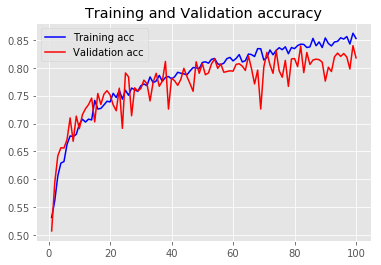

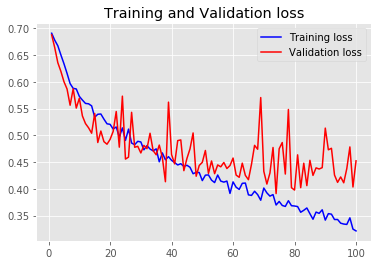

In [26]:
# plots
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [27]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                   target_size=(150,150),
                                   batch_size=32,
                                   class_mode='binary')

evaluation = model2.evaluate_generator(test_generator,
                          steps=50)

Found 1000 images belonging to 2 classes.


In [28]:
# %notify -m 'execution completed'
for i in range(2):
    print(model2.metrics_names[i],':',evaluation[i])


<IPython.core.display.Javascript object>

loss : 0.5152499271830931
acc : 0.824238578680203
